# Fashion MNIST with PyTorch

The objective of this project is to perform the following task: 1)Implement notebook 1: Fashion_MNIST_with_PyTorch.ipynb 2) Modify the model by tuning the polling between layers. 3) Compare and explain results between the two notebooks.  What differs within the obtained results?  Explain what happened. 4) Lower the threshold on the loss function as needed and repeat the test. 5) Compare accuracy obtained with both notebooks.  You need to implement accuracy calculation for the 1st notebook based on the template from the 2nd notebook.

# Entire Notebook code: Fashion_MNIST_with_PyTorch.ipynb (original code with some modification for better visualization)

100%|██████████| 26421880/26421880 [00:01<00:00, 17494602.58it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 306016.97it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5611936.25it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18534143.34it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



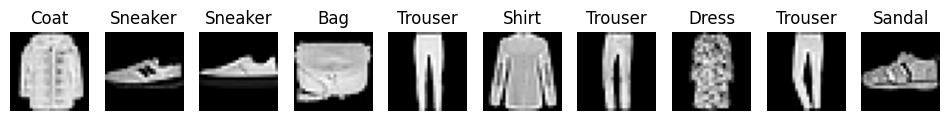

Epoch, Loss:     1, 1.72
Epoch, Loss:     2, 0.848
Epoch, Loss:     3, 0.68
Epoch, Loss:     4, 0.614
Epoch, Loss:     5, 0.572
Epoch, Loss:     6, 0.541
Epoch, Loss:     7, 0.517
Epoch, Loss:     8, 0.498
Epoch, Loss:     9, 0.482
Epoch, Loss:    10, 0.47
Epoch, Loss:    11, 0.459
Epoch, Loss:    12, 0.449
Epoch, Loss:    13, 0.44
Epoch, Loss:    14, 0.434
Epoch, Loss:    15, 0.426
Epoch, Loss:    16, 0.42
Epoch, Loss:    17, 0.414
Epoch, Loss:    18, 0.409
Epoch, Loss:    19, 0.404
Epoch, Loss:    20, 0.4


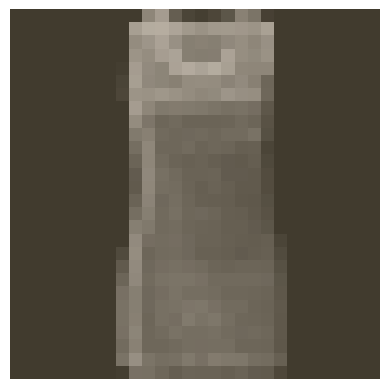

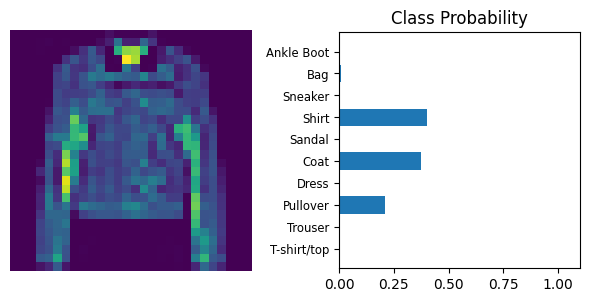

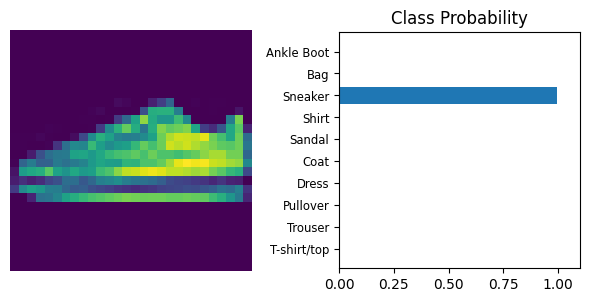

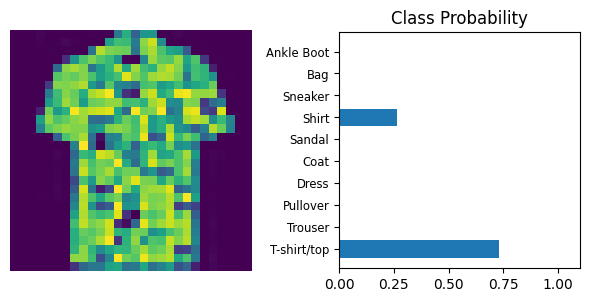

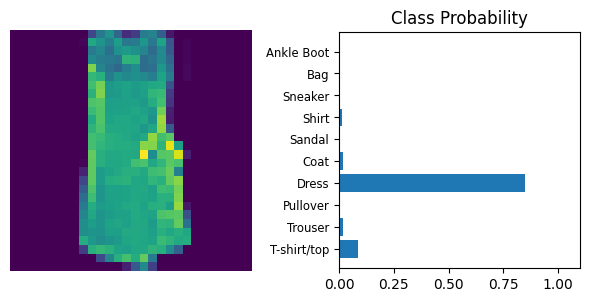

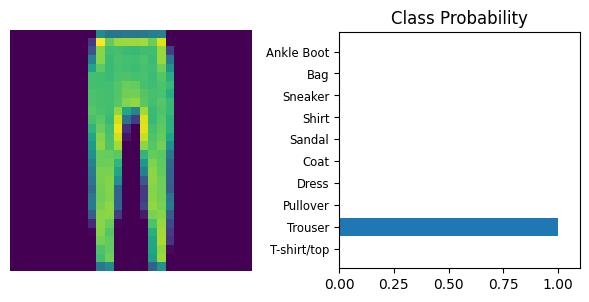

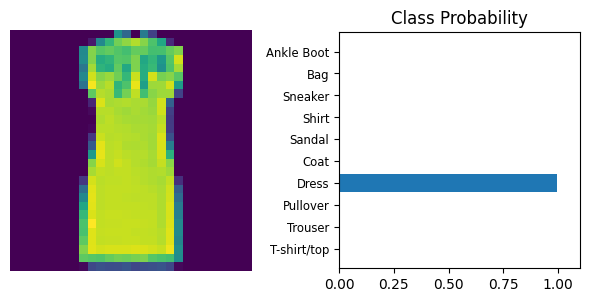

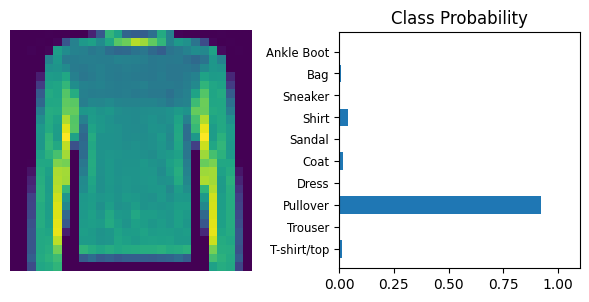

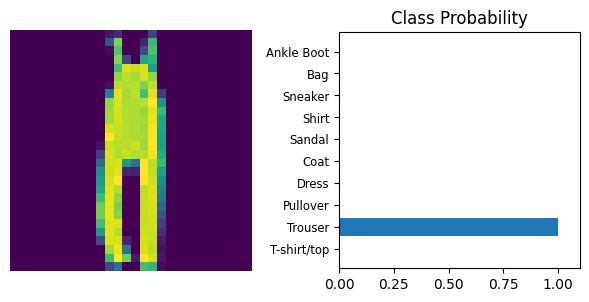

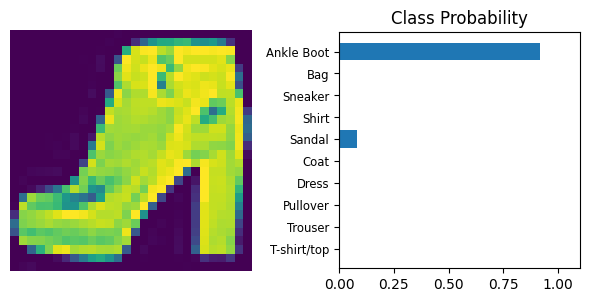

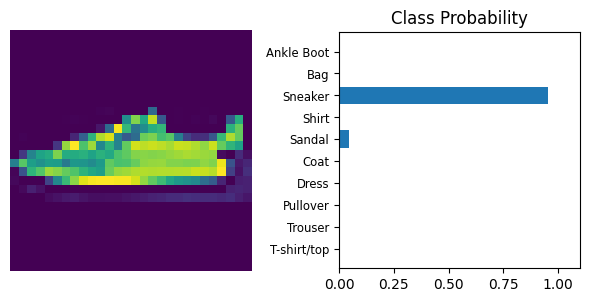

In [1]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix

# Defining a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Downloading and loading the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                 download=True,
                                 train=True,
                                 transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Defining class labels for Fashion MNIST
def display_sample_images(trainloader, classes):
    dataiter = iter(trainloader)
    images, labels = next(dataiter)
    images = images[:10]
    labels = labels[:10]

    fig, axes = plt.subplots(1, len(images), figsize=(12,12))
    for idx, image in enumerate(images):
        axes[idx].imshow(image.squeeze(), cmap='gray')
        axes[idx].set_title(classes[labels[idx]])
        axes[idx].axis('off')
    plt.show()

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Function to display sample images from Fashion MNIST dataset
display_sample_images(trainloader, classes)


trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                 download=True,
                                 train=True,
                                 transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=64,
                                          shuffle=True)

# Downloading and loading the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                download=True,
                                train=False,
                                transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=64,
                                         shuffle=True)

# Helper function to print one of the images
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

# Printing one image
image, label = next(iter(trainloader))
imshow(image[0,:]);

# Defining the Network Architecture
from torch import nn

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Defining the optimizer
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),
                      lr=0.003)

# Making a forward pass through the network
epoch = 1
while True:
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    training_loss = running_loss/len(trainloader)
    print("Epoch, Loss:    {:2}, {:1.3}".format(epoch, training_loss))
    epoch += 1

    if training_loss < 0.4:
        break

# Creating helper function for printing
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

# Printing one image for each class and plotting the class probability as classification
dataiter = iter(testloader)
for _ in range(10):
    images, labels = next(dataiter)
    img = images[0]

    # Converting 2D image to 1D vector
    img = img.resize_(1, 784)

    # Turning off gradients to speed up
    with torch.no_grad():
        logps = model(img)

    # Plotting the image and probabilities
    view_classify(img.resize_(1, 28, 28), ps)

# Entire Notebook code after Modifiaction: Fashion_MNIST_with_PyTorch.ipynb (modified code):

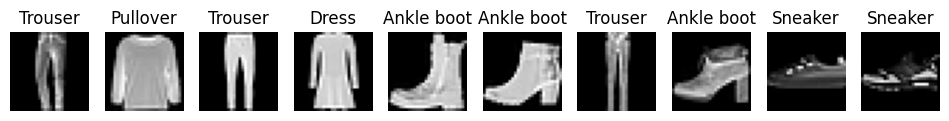

Epoch, Loss:     1, 0.518
Epoch, Loss:     2, 0.381


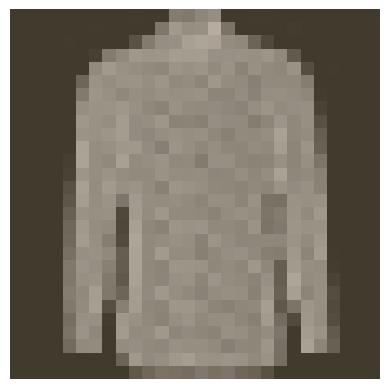

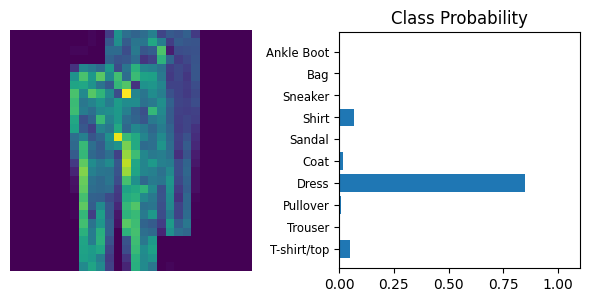

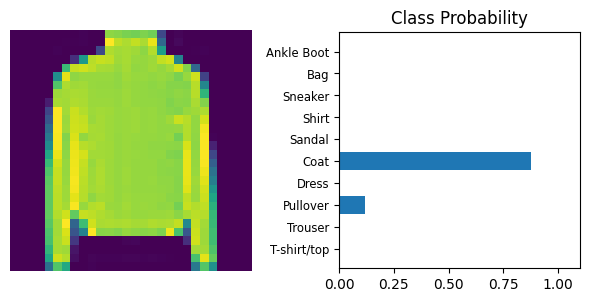

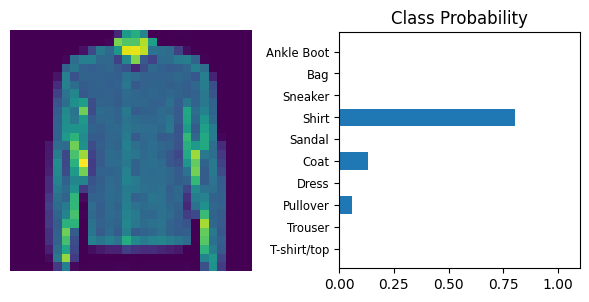

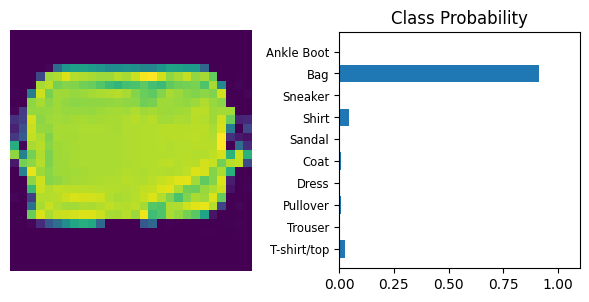

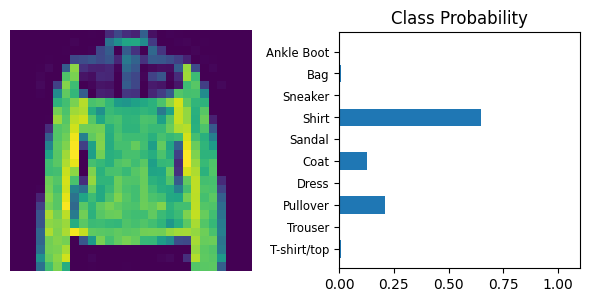

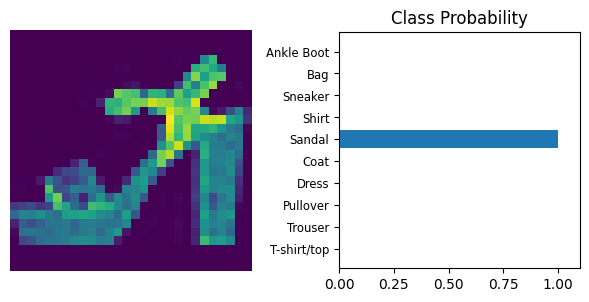

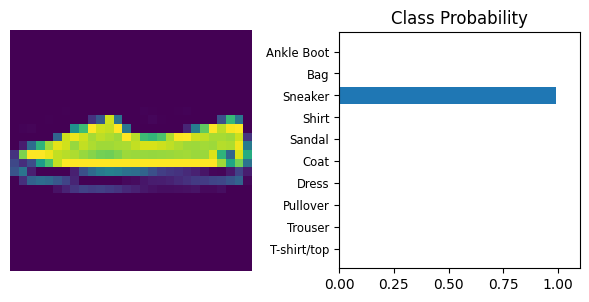

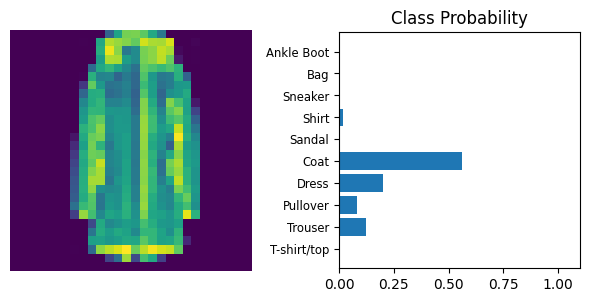

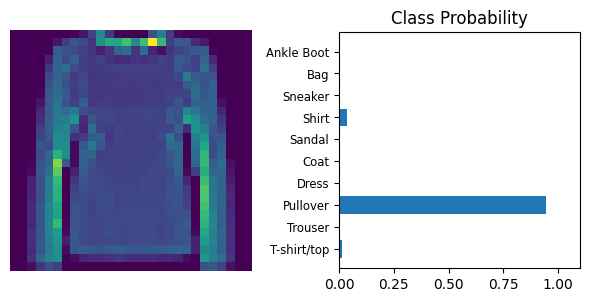

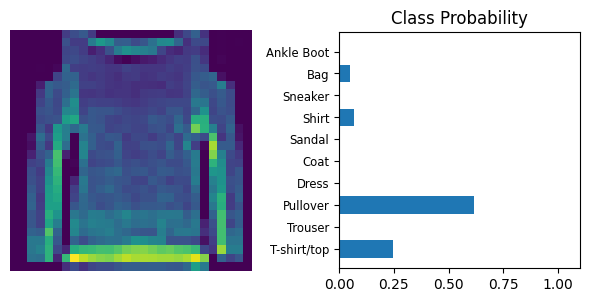

In [2]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix

# Defining a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Downloading and loading the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                 download=True,
                                 train=True,
                                 transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Defining class labels for Fashion MNIST
def display_sample_images(trainloader, classes):
    dataiter = iter(trainloader)
    images, labels = next(dataiter)
    images = images[:10]
    labels = labels[:10]

    fig, axes = plt.subplots(1, len(images), figsize=(12,12))
    for idx, image in enumerate(images):
        axes[idx].imshow(image.squeeze(), cmap='gray')
        axes[idx].set_title(classes[labels[idx]])
        axes[idx].axis('off')
    plt.show()

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to display sample images from Fashion MNIST dataset
display_sample_images(trainloader, classes)

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                 download=True,
                                 train=True,
                                 transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=64,
                                          shuffle=True)

# Downloading and loading the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                download=True,
                                train=False,
                                transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=64,
                                         shuffle=True)

# Helper function to print one of the images
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

# Printing one image
image, label = next(iter(trainloader))
imshow(image[0,:]);

# Defining the Network Architecture
from torch import nn

# Modified Neural Network model with max-pooling between layers
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.MaxPool1d(1),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.MaxPool1d(1),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Using Cross-Entropy Loss and Adam optimizer
loss_fn = nn.CrossEntropyLoss()

# Using Adam
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Making a forward pass through the network
epoch = 1
while True:
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    training_loss = running_loss/len(trainloader)
    print("Epoch, Loss:    {:2}, {:1.3}".format(epoch, training_loss))
    epoch += 1

    if training_loss < 0.4:
        break

# Creating helper function for printing
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

# Printing one image for each class and plotting the class probability as classification
dataiter = iter(testloader)
for _ in range(10):
    images, labels = next(dataiter)
    img = images[0]

    # Converting 2D image to 1D vector
    img = img.resize_(1, 784)

    # Turning off gradients to speed up
    with torch.no_grad():
        logps = model(img)
    # Output of the network are log-probabilities
    ps = torch.exp(logps)

    # Plotting the image and probabilities
    view_classify(img.resize_(1, 28, 28), ps)

# Compare and Explain Results Between Both Notebook:

#### What differs within the obtained results?
#### Convergence Speed:
Original Code: Took 20 epochs to reach a loss below 0.4.

Modified Code: Took only 2 epochs to reach a loss below 0.4.
#### Optimizer:
Original Code: Used SGD which is generally slower to converge.

Modified Code: Used Adam which typically converges faster.
#### Loss Function:
Original Code: Used NLLLoss.
Modified Code: Used Cross-Entropy Loss (though both are mathematically similar when coupled with LogSoftmax).
#### Architecture:
Original Code: Simple feed-forward neural network.

Modified Code: Introduced Max Pooling layers after ReLU activations.

#### Explain What Happened?
#### Faster Convergence:
The use of the Adam optimizer likely contributed to the faster convergence in the modified code.

#### Lower Training Loss:
The modified code achieved a lower training loss more quickly. This could be a combination of the Adam optimizer and the architecture changes.

#### Non-standard Pooling:
The use of Max Pooling after fully connected layers is non-standard and its effect is not clear-cut without further evaluation.
#### Summary:
In my modified code, **the training loss converged much faster, reaching below 0.4 in just 2 epochs compared to 20 epochs in the original code**. This speed-up is largely attributed to the switch from **SGD to the Adam optimizer**. I also introduced Max Pooling layers in the architecture. Both notebook use similar loss functions, so no performance difference is found to that aspect.

# Lower the threshold on the loss function as needed and repeat the test:

### Lower the threshold on the loss function from 0.4 to 0.2 for Notebook 1:

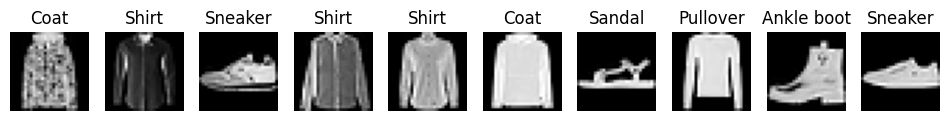

Epoch, Loss:     1, 1.67
Epoch, Loss:     2, 0.859
Epoch, Loss:     3, 0.681
Epoch, Loss:     4, 0.606
Epoch, Loss:     5, 0.56
Epoch, Loss:     6, 0.528
Epoch, Loss:     7, 0.505
Epoch, Loss:     8, 0.487
Epoch, Loss:     9, 0.474
Epoch, Loss:    10, 0.463
Epoch, Loss:    11, 0.454
Epoch, Loss:    12, 0.446
Epoch, Loss:    13, 0.439
Epoch, Loss:    14, 0.432
Epoch, Loss:    15, 0.426
Epoch, Loss:    16, 0.421
Epoch, Loss:    17, 0.416
Epoch, Loss:    18, 0.41
Epoch, Loss:    19, 0.405
Epoch, Loss:    20, 0.401
Epoch, Loss:    21, 0.397
Epoch, Loss:    22, 0.393
Epoch, Loss:    23, 0.389
Epoch, Loss:    24, 0.385
Epoch, Loss:    25, 0.381
Epoch, Loss:    26, 0.377
Epoch, Loss:    27, 0.374
Epoch, Loss:    28, 0.37
Epoch, Loss:    29, 0.367
Epoch, Loss:    30, 0.364
Epoch, Loss:    31, 0.361
Epoch, Loss:    32, 0.358
Epoch, Loss:    33, 0.355
Epoch, Loss:    34, 0.352
Epoch, Loss:    35, 0.349
Epoch, Loss:    36, 0.347
Epoch, Loss:    37, 0.344
Epoch, Loss:    38, 0.341
Epoch, Loss:    

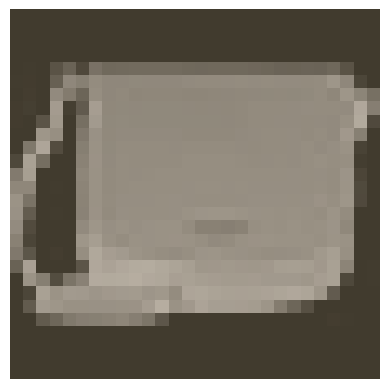

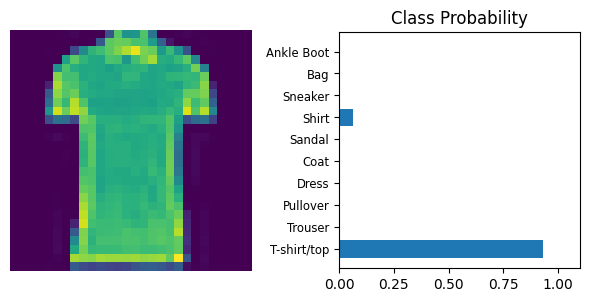

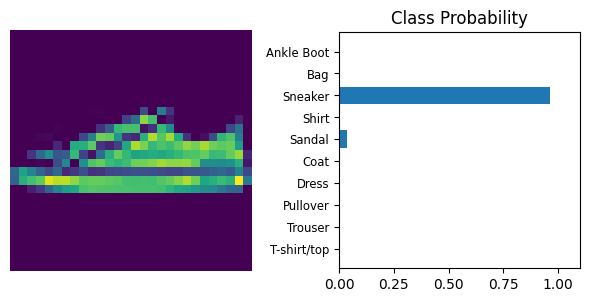

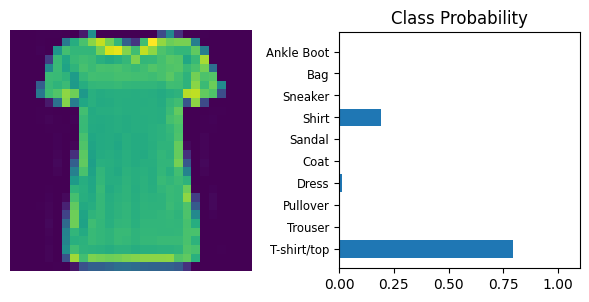

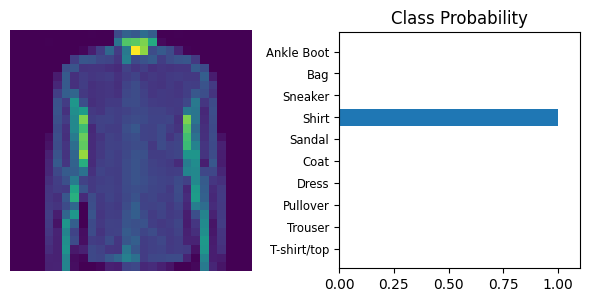

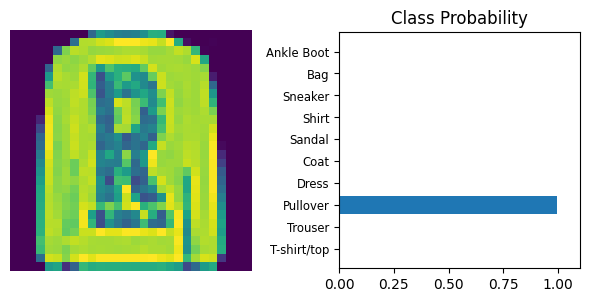

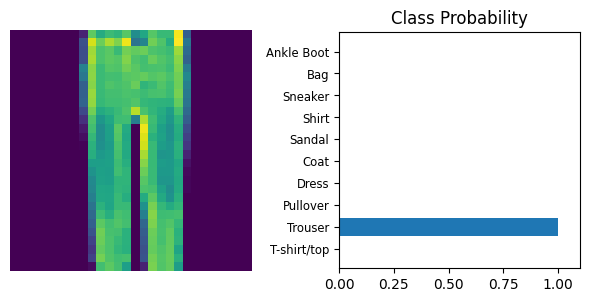

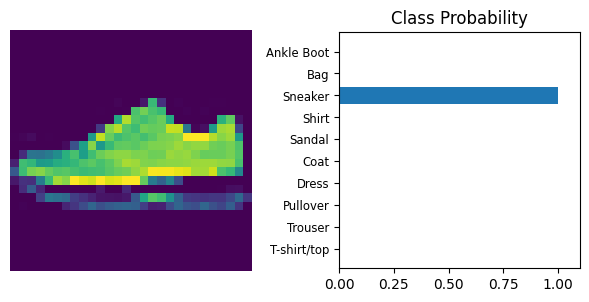

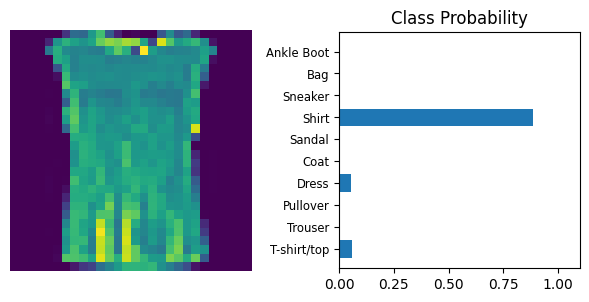

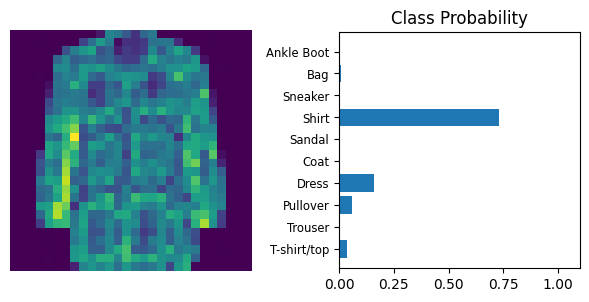

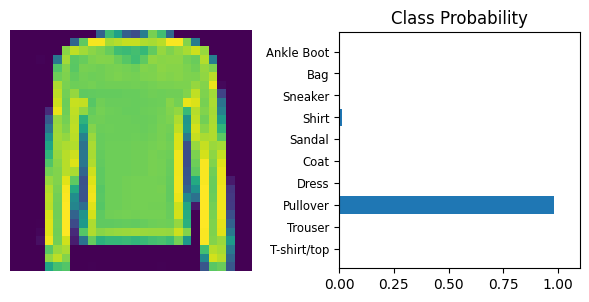

In [3]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from sklearn.metrics import confusion_matrix
from torchvision import datasets, transforms

# Defining a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Downloading and loading the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                 download=True,
                                 train=True,
                                 transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Defining class labels for Fashion MNIST
def display_sample_images(trainloader, classes):
    dataiter = iter(trainloader)
    images, labels = next(dataiter)  # Corrected this line
    images = images[:10]
    labels = labels[:10]

    fig, axes = plt.subplots(1, len(images), figsize=(12,12))
    for idx, image in enumerate(images):
        axes[idx].imshow(image.squeeze(), cmap='gray')
        axes[idx].set_title(classes[labels[idx]])
        axes[idx].axis('off')
    plt.show()

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to display sample images from Fashion MNIST dataset
display_sample_images(trainloader, classes)

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                 download=True,
                                 train=True,
                                 transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=64,
                                          shuffle=True)
# Downloading and loading the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                download=True,
                                train=False,
                                transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=64,
                                         shuffle=True)

# Helper function to print one of the images
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

# Printing one image
image, label = next(iter(trainloader))
imshow(image[0,:]);

# Defining the Network Architecture
from torch import nn

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Defining the optimizer
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),
                      lr=0.003)

# Making a forward pass through the network
epoch = 1
while True:
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    training_loss = running_loss/len(trainloader)
    print("Epoch, Loss:    {:2}, {:1.3}".format(epoch, training_loss))
    epoch += 1

    if training_loss < 0.2:
        break

# Creating helper function for printing
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

# Printing one image for each class and plotting the class probability as classification
dataiter = iter(testloader)
for _ in range(10):
    images, labels = next(dataiter)
    img = images[0]

    # Converting 2D image to 1D vector
    img = img.resize_(1, 784)

    # Turning off gradients to speed up
    with torch.no_grad():
        logps = model(img)
    # Output of the network are log-probabilities
    ps = torch.exp(logps)

    # Plotting the image and probabilities
    view_classify(img.resize_(1, 28, 28), ps)

# Lowering the threshold on the loss function from 0.4 to 0.2 for Notebook 2

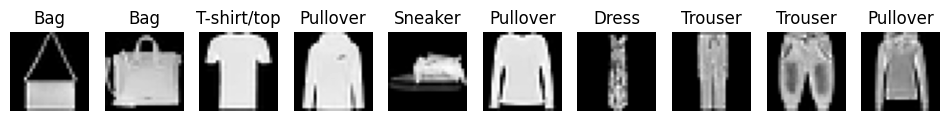

Epoch, Loss:     1, 0.519
Epoch, Loss:     2, 0.38
Epoch, Loss:     3, 0.34
Epoch, Loss:     4, 0.314
Epoch, Loss:     5, 0.294
Epoch, Loss:     6, 0.283
Epoch, Loss:     7, 0.267
Epoch, Loss:     8, 0.259
Epoch, Loss:     9, 0.246
Epoch, Loss:    10, 0.234
Epoch, Loss:    11, 0.227
Epoch, Loss:    12, 0.219
Epoch, Loss:    13, 0.215
Epoch, Loss:    14, 0.204
Epoch, Loss:    15, 0.198


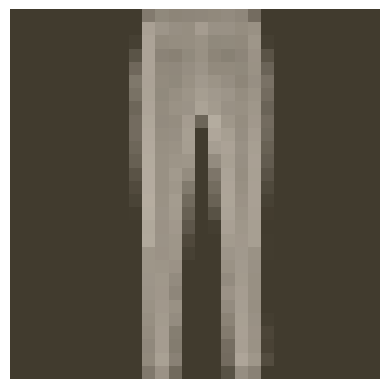

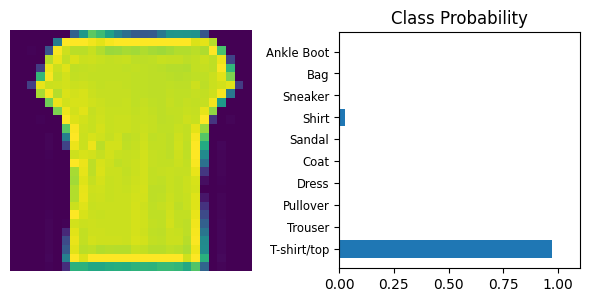

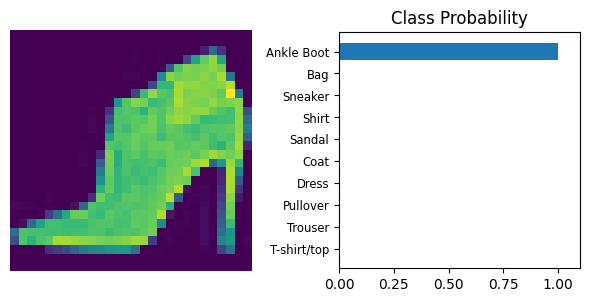

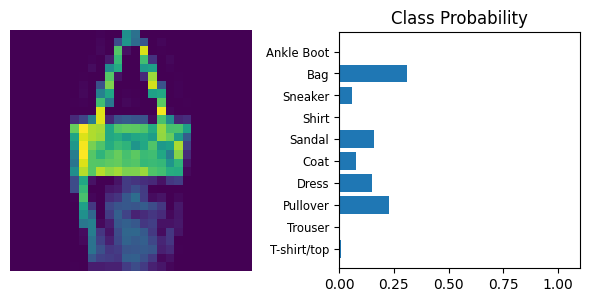

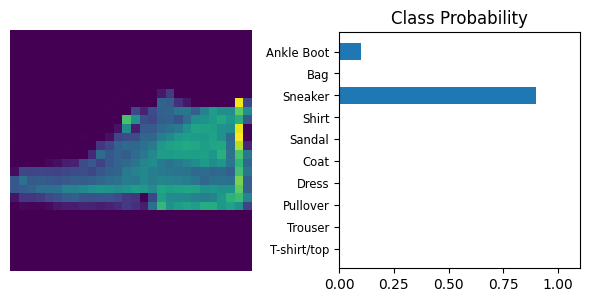

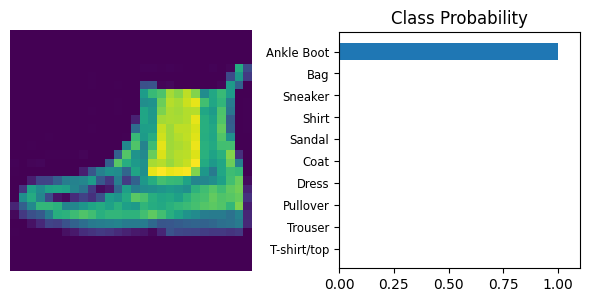

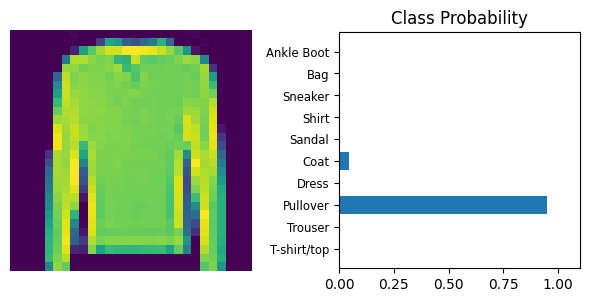

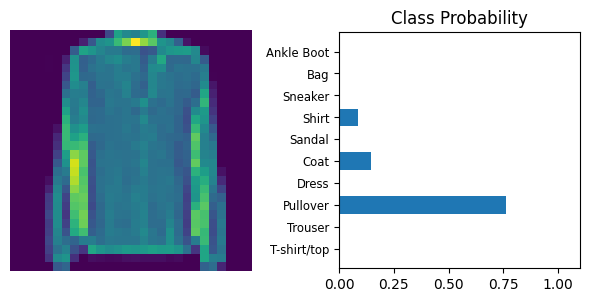

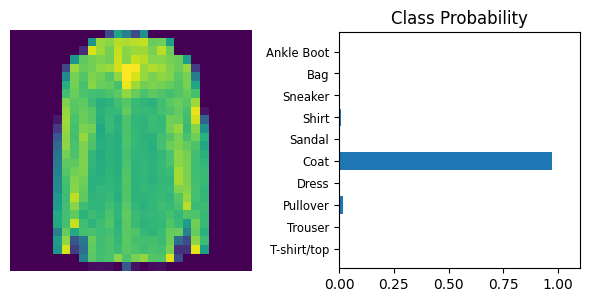

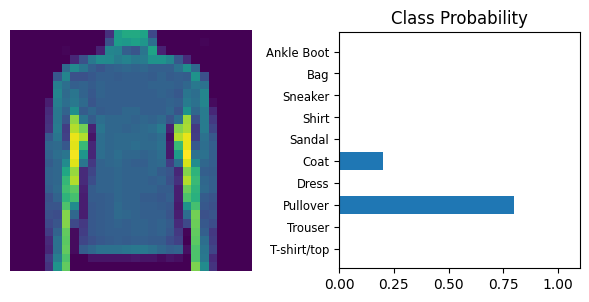

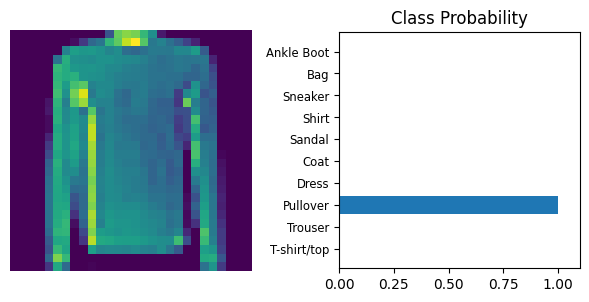

In [4]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix

# Defining a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Downloading and loading the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                 download=True,
                                 train=True,
                                 transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Defining class labels for Fashion MNIST
def display_sample_images(trainloader, classes):
    dataiter = iter(trainloader)
    images, labels = next(dataiter)  # Corrected this line
    images = images[:10]
    labels = labels[:10]

    fig, axes = plt.subplots(1, len(images), figsize=(12,12))
    for idx, image in enumerate(images):
        axes[idx].imshow(image.squeeze(), cmap='gray')
        axes[idx].set_title(classes[labels[idx]])
        axes[idx].axis('off')
    plt.show()

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to display sample images from Fashion MNIST dataset
display_sample_images(trainloader, classes)


trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                 download=True,
                                 train=True,
                                 transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=64,
                                          shuffle=True)

# Downloading and loading the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                download=True,
                                train=False,
                                transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=64,
                                         shuffle=True)

# Helper function to print one of the images
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

# Printing one image
image, label = next(iter(trainloader))
imshow(image[0,:]);

# Defining the Network Architecture
from torch import nn

# Modified Neural Network model with max-pooling between layers
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.MaxPool1d(1),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.MaxPool1d(1),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Using Cross-Entropy Loss and Adam optimizer
loss_fn = nn.CrossEntropyLoss()

# Using Adam
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Make a forward pass through the network
epoch = 1
while True:
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    training_loss = running_loss/len(trainloader)
    print("Epoch, Loss:    {:2}, {:1.3}".format(epoch, training_loss))
    epoch += 1

    if training_loss < 0.2:
        break

# Creating helper function for printing
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

# Printing one image for each class and plotting the class probability
dataiter = iter(testloader)
for _ in range(10):
    images, labels = next(dataiter)
    img = images[0]

    # Converting 2D image to 1D vector
    img = img.resize_(1, 784)

    # Turning off gradients to speed up
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)

    # Plotting the image and probabilities
    view_classify(img.resize_(1, 28, 28), ps)

# Original Code with Accuracy Calculation:

In [5]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim

# Initializing counters for accuracy
correct_count, all_count = 0, 0

# Defining a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Downloading and loading the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Defining the model
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Defining the loss
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

# Training loop
epoch = 1
while True:
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # For accuracy calculation
        _, predicted_labels = torch.max(output, 1)
        correct_count += (predicted_labels == labels).sum().item()
        all_count += labels.size(0)

    training_loss = running_loss / len(trainloader)
    print("Epoch, Loss: {:2}, {:1.3}".format(epoch, training_loss))
    epoch += 1

    if training_loss < 0.2:
        break

# Calculating accuracy for the original code
accuracy_original = correct_count / all_count
print("Accuracy after training in Notebook 1 is: {:.2f}%".format(accuracy_original*100))

Epoch, Loss:  1, 1.64
Epoch, Loss:  2, 0.835
Epoch, Loss:  3, 0.667
Epoch, Loss:  4, 0.601
Epoch, Loss:  5, 0.559
Epoch, Loss:  6, 0.53
Epoch, Loss:  7, 0.509
Epoch, Loss:  8, 0.493
Epoch, Loss:  9, 0.48
Epoch, Loss: 10, 0.47
Epoch, Loss: 11, 0.46
Epoch, Loss: 12, 0.452
Epoch, Loss: 13, 0.445
Epoch, Loss: 14, 0.438
Epoch, Loss: 15, 0.432
Epoch, Loss: 16, 0.427
Epoch, Loss: 17, 0.422
Epoch, Loss: 18, 0.417
Epoch, Loss: 19, 0.412
Epoch, Loss: 20, 0.408
Epoch, Loss: 21, 0.403
Epoch, Loss: 22, 0.399
Epoch, Loss: 23, 0.395
Epoch, Loss: 24, 0.391
Epoch, Loss: 25, 0.387
Epoch, Loss: 26, 0.384
Epoch, Loss: 27, 0.38
Epoch, Loss: 28, 0.377
Epoch, Loss: 29, 0.373
Epoch, Loss: 30, 0.37
Epoch, Loss: 31, 0.366
Epoch, Loss: 32, 0.364
Epoch, Loss: 33, 0.361
Epoch, Loss: 34, 0.358
Epoch, Loss: 35, 0.355
Epoch, Loss: 36, 0.352
Epoch, Loss: 37, 0.349
Epoch, Loss: 38, 0.347
Epoch, Loss: 39, 0.344
Epoch, Loss: 40, 0.341
Epoch, Loss: 41, 0.339
Epoch, Loss: 42, 0.337
Epoch, Loss: 43, 0.334
Epoch, Loss: 44, 0

# Modified Code with Accuracy Calculation:

In [6]:
# Initializing counters for accuracy
correct_count, all_count = 0, 0

# Training loop
epoch = 1
while True:
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # For accuracy calculation
        _, predicted_labels = torch.max(output, 1)
        correct_count += (predicted_labels == labels).sum().item()
        all_count += labels.size(0)

    training_loss = running_loss / len(trainloader)
    print("Epoch, Loss: {:2}, {:1.3}".format(epoch, training_loss))
    epoch += 1

    if training_loss < 0.2:
        break

# Calculating accuracy for the modified code
accuracy_modified = correct_count / all_count
print("Accuracy after training in Notebook 2 is: {:.2f}%".format(accuracy_modified*100))

Epoch, Loss:  1, 0.199
Accuracy after training in Notebook 2 is: 93.10%
